Overall Metrics:
accuracy: 0.528
macro_precision: 0.489
macro_recall: 0.494
macro_f1: 0.481


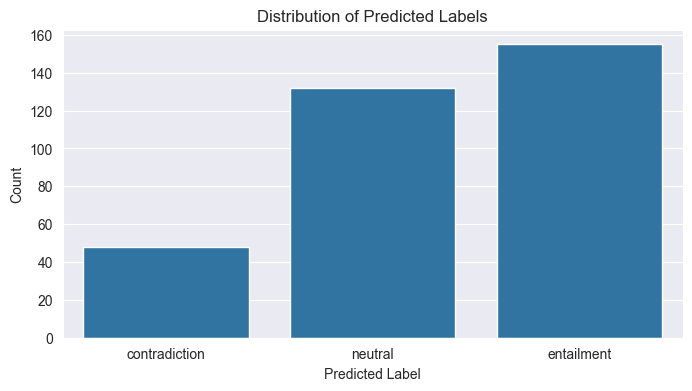

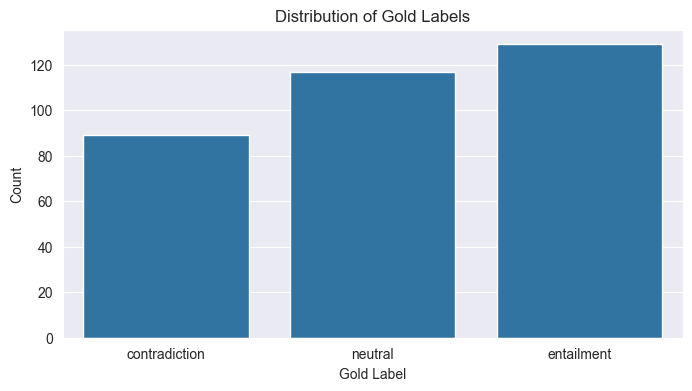

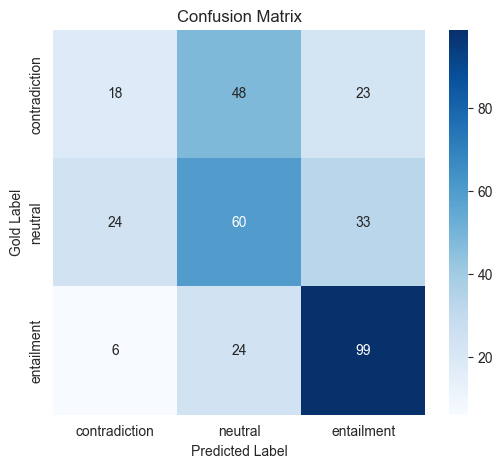

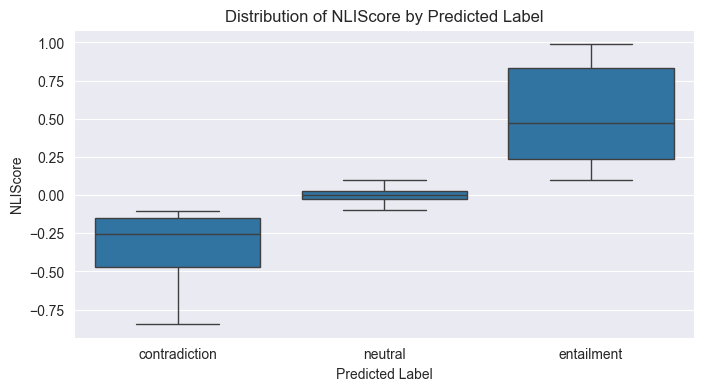

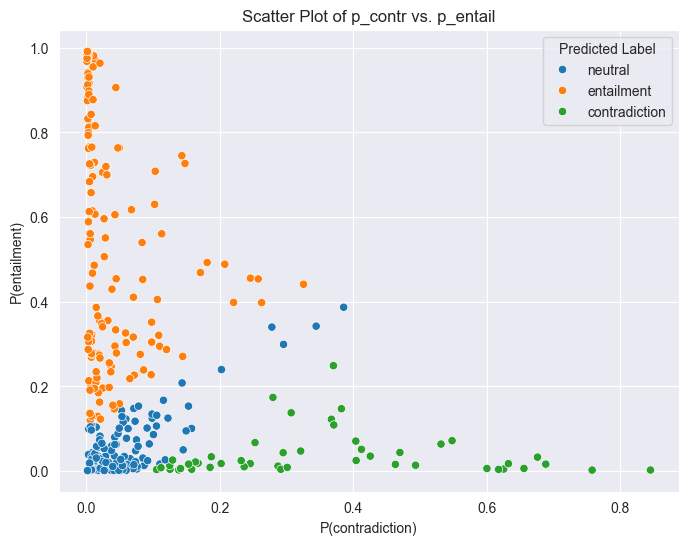

In [50]:
# %% [code]
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results JSON file
results_file = "nli_verification_results_subset.json"  # change this if needed
with open(results_file, "r", encoding="utf-8") as f:
    results_data = json.load(f)

# Extract overall metrics (if stored at the top-level) and the per-claim results.
metrics = results_data.get("metrics", {})
results = results_data.get("results", [])

print("Overall Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")

# Convert results to a DataFrame for further analysis.
df = pd.DataFrame(results)
df.head()

# %% [code]
# Distribution of predicted and gold labels
plt.figure(figsize=(8, 4))
sns.countplot(x="pred_label", data=df, order=["contradiction", "neutral", "entailment"])
plt.title("Distribution of Predicted Labels")
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x="gold_label", data=df, order=["contradiction", "neutral", "entailment"])
plt.title("Distribution of Gold Labels")
plt.xlabel("Gold Label")
plt.ylabel("Count")
plt.show()

# %% [code]
# Compare predicted vs. gold labels: create a confusion matrix.
from sklearn.metrics import confusion_matrix
import numpy as np

labels = ["contradiction", "neutral", "entailment"]
cm = confusion_matrix(df["gold_label"], df["pred_label"], labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Gold Label")
plt.show()

# %% [code]
# Analyze NLIScore distribution by predicted label.
plt.figure(figsize=(8, 4))
sns.boxplot(x="pred_label", y="NLIScore", data=df, order=["contradiction", "neutral", "entailment"])
plt.title("Distribution of NLIScore by Predicted Label")
plt.xlabel("Predicted Label")
plt.ylabel("NLIScore")
plt.show()

# %% [code]
# Scatter plot for entailment vs. contradiction probabilities for further insight.
plt.figure(figsize=(8, 6))
sns.scatterplot(x="p_contr", y="p_entail", hue="pred_label", data=df)
plt.title("Scatter Plot of p_contr vs. p_entail")
plt.xlabel("P(contradiction)")
plt.ylabel("P(entailment)")
plt.legend(title="Predicted Label")
plt.show()

# %% [code]
# Additional insight: How many claims were assigned each evidence span granularity (if available).
if "span_granularity" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x="span_granularity", data=df)
    plt.title("Count by Span Granularity")
    plt.xlabel("Granularity")
    plt.ylabel("Count")
    plt.show()


In [ ]:
print("=== Overall Metrics ===")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.3f}")


In [ ]:
gold_counts = Counter(df["gold_label"])
print("Gold label distribution:", gold_counts)

In [ ]:
pred_counts = Counter(df["pred_label"])
print("Predicted label distribution:", pred_counts)


In [ ]:
labels = ["contradiction", "neutral", "entailment"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].bar(labels, [gold_counts[l] for l in labels], color="skyblue")
axes[0].set_title("Gold Label Distribution")
axes[0].set_ylabel("Count")

axes[1].bar(labels, [pred_counts[l] for l in labels], color="lightgreen")
axes[1].set_title("Predicted Label Distribution")

plt.tight_layout()
plt.show()


In [ ]:
label_map = {"contradiction": 0, "neutral": 1, "entailment": 2}
df["gold_id"] = df["gold_label"].map(label_map)
df["pred_id"] = df["pred_label"].map(label_map)

confusion = pd.crosstab(df["gold_id"], df["pred_id"], rownames=["Gold"], colnames=["Pred"])
confusion


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.title("Confusion Matrix (Gold vs. Predicted)")
plt.show()

In [ ]:
df[["gold_label", "max_entailment_score", "max_contradiction_score", "max_neutral_score"]].describe()

In [ ]:
plt.figure(figsize=(12, 4))
scores_cols = ["max_contradiction_score","max_neutral_score","max_entailment_score"]
df[scores_cols].hist(bins=20, figsize=(12, 4))
plt.suptitle("Distribution of max scores across all claims")
plt.show()
